# SymPy

In [1]:
from datascience import *
import numpy as np
from sympy import *
import sympy
init_printing()
import matplotlib.pyplot as plt
%matplotlib inline
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"

Python has many tools, such as the [SymPy library](https://docs.sympy.org/latest/tutorial/index.html) that we can use for expressing and evaluating formulas and functions in economics. 

Since SymPy helps with symbolic math, we start out by create a symbol using `Symbol`, which we assign to a variable name. Then, we can use the symbols to construct symbolic expressions.

In [2]:
x = Symbol('x')
x

Now let's try using SymPy to create a symbolic expression for some hypothetical supply and demand curves. 

To define an upward sloping supply curve with price expressed as a function of quantity, we start off defining the symbol $Q$, which represents quantity. Then, we set up a negative relationship expressing $P_S$, which denotes the price of the supplied good (how much the producer earns), in terms of $Q$. 

In [3]:
Q = Symbol('Q')
P_S = 2 * Q - 3
P_S

Similarly, we will also use $Q$ to express a relationship with $P_D$, the price of the good purchased (how much the consumer pays), creating a downward sloping demand curve. 

Note that both functions are of the variable $Q$; this will be important in allowing us to solve for the equilibrium.

In [4]:
P_D = 2 - Q
P_D

To solve for the equilibrium given the supply and demand curve, we know that the price paid by consumers must equal to the price earned by suppliers. Thus, $P_D = P_S$, allowing us to set the two equations equal to each other and solve for the equilibrium quantity and thus equilibrium price. To solve this by hand, we would set up the following equation to solve for $Q$:

$$
P_D = P_S\\
2-Q = 2Q-3
$$

Using SymPy, we call `solve`, which takes in 2 arguments that represent the 2 sides of an equation and solves for the underlying variable such that the equation holds. Here, we pass in $P_D$ and $P_S$, both represented in terms of $Q$, to solve for the value of $Q$ such that $P_D=P_S$. It's good to know that `solve` is a custom function built for this class, and will be provided in the notebooks for you.

In [5]:
Q_star = solve(P_D, P_S)
Q_star

The value of $Q$ that equates $P_D$ and $P_S$ is known as the market equilibrium quantity, and we denote it as $Q^*$. Here, $Q^* = \frac{5}{3}$. 

With $Q^*$ determined, we can substitute this value as $Q$ to thus calculate $P_D$ or $P_S$. We substitute values using the `subs` function, which follows the syntax `expression.subs(symbol_we_want_to_substitute, value_to_substitute_with)`.

In [6]:
P_D.subs(Q, Q_star)

We can also substitute $Q^*$ into $P_S$, and should get the same results.

In [7]:
P_S.subs(Q, Q_star)

Thus, the equilibrium price and quantity are \$0.33 and $\frac{5}{3}$, respectively. 

Let's try another example. Suppose our demand function is $\text{Price}_{D}=-2 \cdot \text{Quantity} + 10$. Using SymPy, this would be

In [9]:
demand = -2 * Q + 10
demand

In addition, let the supply function be $\text{Price}_{S}=3 \cdot \text{Quantity} + 1$. Using SymPy, this would be


In [10]:
supply = 3 * Q + 1
supply

We will now try to find the market equilibrium. The market price equilibrium $P^*$ is the price at which the quantity supplied and quantity demanded of a good or service are equal to each other. Similarly, the market quantity equilibrium $Q^*$ is the quantity at which the price paid by consumers is equal to the price received by producers. 

Combined, the price equilibrium and quantity equilibrium form a point on the graph with quantity and price as its axes, called the equilibrium point. This point is the point at which the demand and supply curves intersect.

First, we solve for the quantity equilibrium.

In [11]:
Q_star = solve(demand, supply)
Q_star

Next, we plug the quantity equilibrium into our demand or supply expression to get the price equilibrium:

In [12]:
demand.subs(Q, 9/5)

Graphically, we can plot the supply and demand curves with quantity on the $x$ axis and price on the $y$ axis. The point at which they intersect is the equilibrium point.

[Following image is a graph with lines for supply and demand intersecting  ]

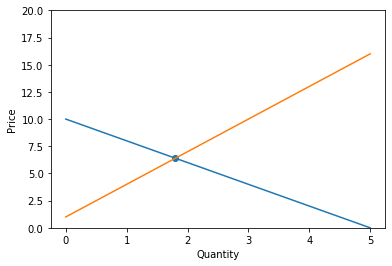

In [14]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(demand, 0, 5)
plot_equation(supply, 0, 5)
plt.ylim(0,20)
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, demand);